# Task 1: Working with series

In [1]:
import pandas as pd

In [2]:
data = [25,30,35,40,45]
series = pd.Series(data)

In [3]:
series

0    25
1    30
2    35
3    40
4    45
dtype: int64

In [4]:
series = pd.Series(data, index=['A','B','C','D','E'])
series

A    25
B    30
C    35
D    40
E    45
dtype: int64

In [5]:
series.head(3)

A    25
B    30
C    35
dtype: int64

In [6]:
series.mean()

np.float64(35.0)

In [7]:
series.median()

np.float64(35.0)

In [9]:
series.std()

np.float64(7.905694150420948)

# Task 2: Creating and Inspecting DataFrames

In [10]:
data = {
    'Name' : ['Alice','Bob','Carol','David','Eve'],
    'Age': [20,22,19,21,20],
    'Gender': ['Female','Male','Female','Male','Female'],
    'Marks': [85,78,92,74,88]
}

In [17]:
df = pd.DataFrame(data)
df

,Name,Age,Gender,Marks
0,Alice,20,Female,85
1,Bob,22,Male,78
2,Carol,19,Female,92
3,David,21,Male,74
4,Eve,20,Female,88


In [18]:
df.head(2)

,Name,Age,Gender,Marks
0,Alice,20,Female,85
1,Bob,22,Male,78


In [19]:
df.columns

Index(['Name', 'Age', 'Gender', 'Marks'], dtype='object')

In [22]:
df.dtypes

Name      object
Age        int64
Gender    object
Marks      int64
dtype: object

In [23]:
df.describe()

,Age,Marks
count,5.000000,5.000000
mean,20.400000,83.400000
std,1.140175,7.334848
min,19.000000,74.000000
25%,20.000000,78.000000
50%,20.000000,85.000000
75%,21.000000,88.000000
max,22.000000,92.000000


In [25]:
pas=[]
for i in df['Marks']:
    if i>=80:
        pas.append(True)
    else:
        pas.append(False)
pas

[True, False, True, False, True]

In [26]:
df['Passed']=pas
df

,Name,Age,Gender,Marks,Passed
0,Alice,20,Female,85,True
1,Bob,22,Male,78,False
2,Carol,19,Female,92,True
3,David,21,Male,74,False
4,Eve,20,Female,88,True


# Task 3: Data Selection and filtering

In [28]:
df[['Name', 'Marks']]

,Name,Marks
0,Alice,85
1,Bob,78
2,Carol,92
3,David,74
4,Eve,88


In [29]:
df[df['Marks']>80]

,Name,Age,Gender,Marks,Passed
0,Alice,20,Female,85,True
2,Carol,19,Female,92,True
4,Eve,20,Female,88,True


In [30]:
df[df['Marks']==df['Marks'].max()]

,Name,Age,Gender,Marks,Passed
2,Carol,19,Female,92,True


# Task 4: Handling Missing Data

In [40]:
df.loc[1,'Marks']=None
df.loc[4,'Age']=None
df

,Name,Age,Gender,Marks,Passed
0,Alice,20.0,Female,85.0,True
1,Bob,22.0,Male,NaN,False
2,Carol,19.0,Female,92.0,True
3,David,21.0,Male,74.0,False
4,Eve,NaN,Female,88.0,True


In [50]:
df.fillna(df.mean(numeric_only=True), inplace=True)
df

,Name,Age,Gender,Marks,Passed
0,Alice,20.0,Female,85.00,True
1,Bob,22.0,Male,84.75,False
2,Carol,19.0,Female,92.00,True
3,David,21.0,Male,74.00,False
4,Eve,20.5,Female,88.00,True


In [42]:
df.dropna()

,Name,Age,Gender,Marks,Passed
0,Alice,20.0,Female,85.0,True
2,Carol,19.0,Female,92.0,True
3,David,21.0,Male,74.0,False


# Task 5: Grouping And Aggregation

In [45]:
gdf=df.groupby(by='Gender')

In [46]:
gdf[['Age','Marks']].mean()

,Age,Marks
Gender,,
Female,19.5,88.333333
Male,21.5,74.000000


In [47]:
gdf[['Age','Marks']].count()

,Age,Marks
Gender,,
Female,2,3
Male,2,1


# Task 6: Reading and Writing Data

In [51]:
df

,Name,Age,Gender,Marks,Passed
0,Alice,20.0,Female,85.00,True
1,Bob,22.0,Male,84.75,False
2,Carol,19.0,Female,92.00,True
3,David,21.0,Male,74.00,False
4,Eve,20.5,Female,88.00,True


In [54]:
df.to_csv('student_data.csv', index=False)

In [56]:
df_new = pd.read_csv('student_data.csv')
df_new

,Name,Age,Gender,Marks,Passed
0,Alice,20.0,Female,85.00,True
1,Bob,22.0,Male,84.75,False
2,Carol,19.0,Female,92.00,True
3,David,21.0,Male,74.00,False
4,Eve,20.5,Female,88.00,True


In [57]:
df_new.head(5)

,Name,Age,Gender,Marks,Passed
0,Alice,20.0,Female,85.00,True
1,Bob,22.0,Male,84.75,False
2,Carol,19.0,Female,92.00,True
3,David,21.0,Male,74.00,False
4,Eve,20.5,Female,88.00,True


# Task 7: General

In [58]:
data = pd.read_csv("IPL2025Batters.csv")

In [59]:
data

,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,100s,50s,4s,6s
0,Sai Sudharsan,GT,759,15,15,1,108*,54.21,486,156.17,1,6,88,21
1,Surya Kumar Yadav,MI,717,16,16,5,73*,65.18,427,167.91,0,5,69,38
2,Virat Kohli,RCB,657,15,15,3,73*,54.75,454,144.71,0,8,66,19
3,Shubman Gill,GT,650,15,15,2,93*,50.00,417,155.87,0,6,62,24
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,1,6,56,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Khaleel Ahmed,CSK,1,14,2,2,1*,-,2,50.00,0,0,0,0
152,Mohit Sharma,DC,1,8,2,1,1*,1.00,3,33.33,0,0,0,0
153,Donovan Ferreira,DC,1,1,1,0,1,1.00,3,33.33,0,0,0,0
154,Digvesh Singh,LSG,1,13,2,1,1,1.00,3,33.33,0,0,0,0


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
data['AVG'] = pd.to_numeric(data['AVG'], errors='coerce')
data['SR'] = pd.to_numeric(data['SR'], errors='coerce')
data['Runs'] = pd.to_numeric(data['Runs'], errors='coerce')
data['BF'] = pd.to_numeric(data['BF'], errors='coerce')
data['HS'] = data['HS'].astype(str).str.replace('*', '', regex=False)
data['HS'] = pd.to_numeric(data['HS'], errors='coerce')

In [62]:
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
Player Name     0
Team            0
Runs            0
Matches         0
Inn             0
No              0
HS              0
AVG            15
BF              0
SR              0
100s            0
50s             0
4s              0
6s              0
dtype: int64


In [63]:
print("Summary Statistics:")
print(data.describe())

Summary Statistics:
             Runs     Matches         Inn          No          HS         AVG  \
count  156.000000  156.000000  156.000000  156.000000  156.000000  141.000000   
mean   161.320513    9.865385    7.153846    1.634615   40.737179   23.087234   
std    180.352772    4.757455    4.810142    1.658163   33.637750   15.094148   
min      1.000000    1.000000    1.000000    0.000000    1.000000    1.000000   
25%     10.750000    6.000000    2.750000    0.000000    8.000000    9.400000   
50%     93.500000   11.000000    6.000000    1.000000   37.000000   23.300000   
75%    254.250000   14.000000   12.000000    3.000000   65.000000   32.750000   
max    759.000000   17.000000   17.000000    7.000000  141.000000   65.180000   

               BF          SR        100s         50s          4s          6s  
count  156.000000  156.000000  156.000000  156.000000  156.000000  156.000000  
mean   105.673077  134.394103    0.057692    0.916667   14.391026    8.294872  
std    112

In [72]:
#  Observation:
#  The average batting average is around 20–25.
# Strike rate varies significantly (some above 200).
#  Few players have 100s; many have 0.

C:\Users\Prakhar Shahi\AppData\Local\Temp\ipykernel_9748\3168291680.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Runs', y='Player Name', data=top_runs, palette='viridis')


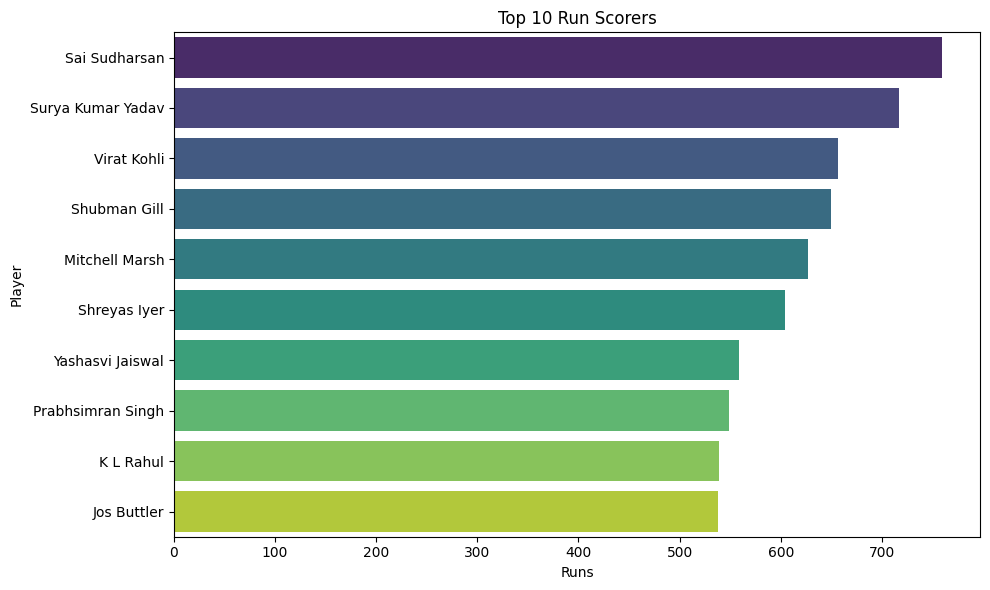

In [64]:
top_runs = data.sort_values(by='Runs', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Runs', y='Player Name', data=top_runs, palette='viridis')
plt.title("Top 10 Run Scorers")
plt.xlabel("Runs")
plt.ylabel("Player")
plt.tight_layout()
plt.show()

In [ ]:
# Finding:
# Players like Sai Sudharsan, Surya Kumar Yadav, and Virat Kohli are top run scorers.

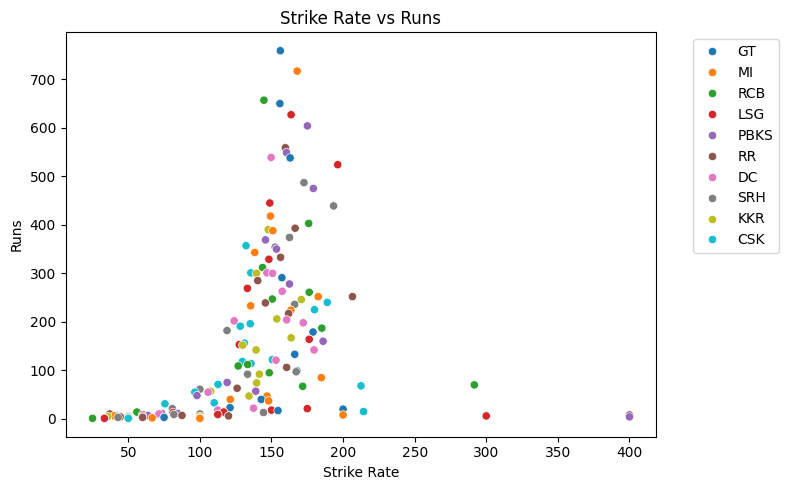

In [69]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data,x='SR', y='Runs', hue='Team')
plt.title("Strike Rate vs Runs")
plt.xlabel("Strike Rate")
plt.ylabel("Runs")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [73]:
# Finding:
# Players with high strike rate often contribute fewer runs (used as finishers),
# while top scorers maintain balance between SR and innings played.

C:\Users\Prakhar Shahi\AppData\Local\Temp\ipykernel_9748\245337812.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_runs.values, y=team_runs.index, palette='coolwarm')


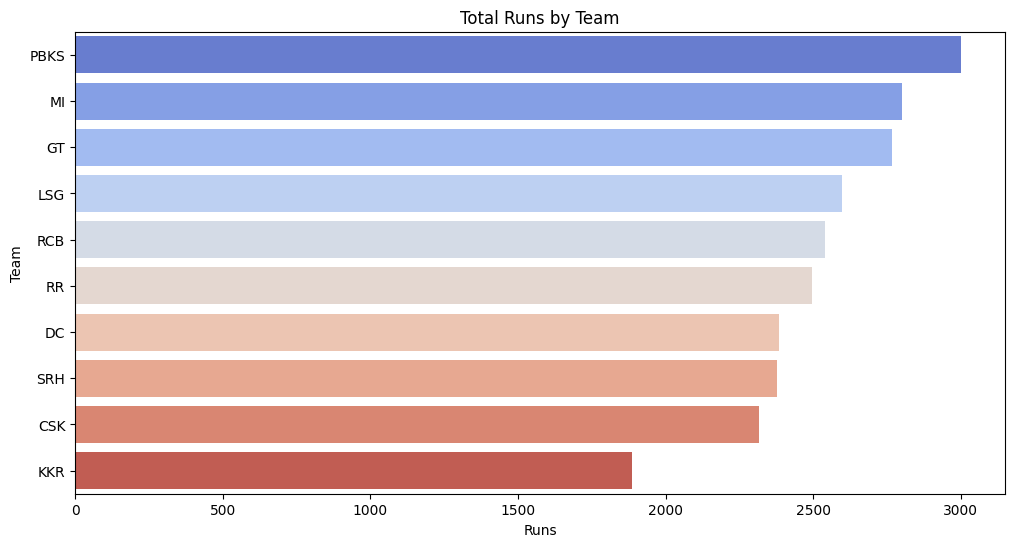

In [70]:
team_runs = data.groupby('Team')['Runs'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=team_runs.values, y=team_runs.index, palette='coolwarm')
plt.title("Total Runs by Team")
plt.xlabel("Runs")
plt.ylabel("Team")
plt.show()

In [ ]:
# Finding:
# Teams like GT, MI, and RCB contribute significantly to total run volume.

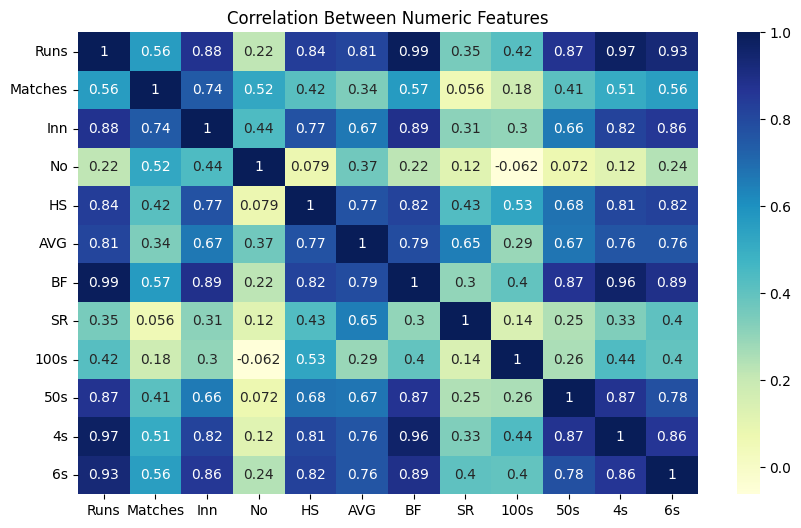

In [71]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title("Correlation Between Numeric Features")
plt.show()

In [ ]:
# Finding:
#  Strong positive correlation between 'Runs' and 'BF' (more balls faced = more runs).
#  Moderate positive correlation between 'Runs' and '4s'/'6s'.

# Summary:
- Sai Sudharsan and Surya Kumar Yadav are top scorers.
- High strike rates don't always mean high run totals (often finishers).
- Some players have incomplete data (e.g., missing AVG or SR).
- Teams like GT and MI dominate run contributions.
- Positive correlation between runs and balls faced, fours, and sixes.